In [1]:
from Models.grid_search_utils import GridSearch as Gs
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

EBMReg = Gs.load_model(name="../Models/GlassBox/ebm/saved_models/EBMReg")

In [2]:
test_set_with = pd.read_csv("../outputs/scores/0_dataset_ts.csv")
test_set_without = pd.read_csv("../outputs/scores/1_dataset_ts.csv")

In [3]:
test_result = test_set_with[["qId","kId"]].copy()
test_result["output_with"] = EBMReg.predict(test_set_with.iloc[:,5:].to_numpy())
test_result["output_without"] = EBMReg.predict(test_set_without.iloc[:,5:].to_numpy())

In [4]:
job_offer = test_result[test_result["qId"] == 18].iloc[:,1:].copy().set_index("kId")
job_offer = job_offer.sort_index()
job_offer["ax0"] = 0
job_offer["ax1"] = 1

In [5]:
job_offer["rank_with"] = job_offer["output_with"].rank(method="first", ascending=False)
job_offer["rank_without"] = job_offer["output_without"].rank(method="first", ascending=False)

In [6]:
job_offer["diff"] = job_offer["rank_without"] - job_offer["rank_with"]

In [7]:
job_offer = job_offer.sort_values(by="rank_with").head(15)

In [8]:
job_offer

,output_with,output_without,ax0,ax1,rank_with,rank_without,diff
kId,,,,,,,
1451,71.031597,49.422044,0,1,1.0,8.0,7.0
1441,66.893106,57.240568,0,1,2.0,2.0,0.0
1448,66.856927,59.061589,0,1,3.0,1.0,-2.0
1472,63.942593,49.588496,0,1,4.0,7.0,3.0
1452,63.122220,46.705640,0,1,5.0,11.0,6.0
1423,60.619158,52.769574,0,1,6.0,3.0,-3.0
1429,59.471432,51.769905,0,1,7.0,4.0,-3.0
1460,59.064911,51.602113,0,1,8.0,6.0,-2.0
1422,57.286253,43.526285,0,1,9.0,13.0,4.0


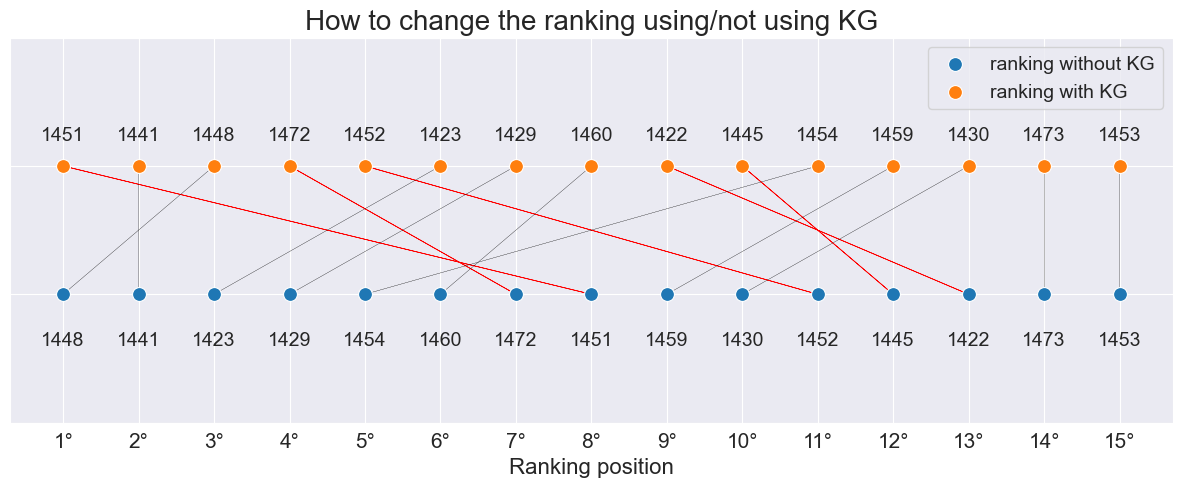

In [9]:
sns.set_style("darkgrid")

_, axs = plt.subplots(figsize=(15, 5))

for kId in job_offer.index:
    pred_without = job_offer.loc[kId,"rank_without"]
    pred_with = job_offer.loc[kId,"rank_with"]
    diff = job_offer.loc[kId,"diff"]
    axs.text(pred_without, job_offer.loc[kId, "ax0"] - 0.4, kId, horizontalalignment='center', size=14)
    axs.text(pred_with, job_offer.loc[kId, "ax1"] + 0.2, kId, horizontalalignment='center', size=14)
    
    color = "Red" if diff > 0 else "Black"
    line_width = 0.5 if diff > 0 else 0.08
    axs.arrow(pred_with,1, diff, -1, linewidth=line_width, color=color)
    
sns.scatterplot(y="ax0", x="rank_without", data=job_offer, s=100, ax=axs, label="ranking without KG")
sns.scatterplot(y="ax1", x="rank_with", data=job_offer, s=100, ax=axs, label="ranking with KG")

axs.set_yticks([-1,0,1,2])

last_pos = int(job_offer["rank_without"].max()) + 1
axs.set_xticks([*range(1,last_pos)],[str(i)+"°" for i in range(1,last_pos)])
axs.tick_params(axis='both', labelsize=15, labelleft=False)
axs.set_ylabel("")
axs.set_xlabel("Ranking position",fontsize=16)
axs.set_title("How to change the ranking using/not using KG", fontsize=20)
axs.grid(True)
axs.legend(fontsize=14)
plt.show()

In [14]:
display(test_set_without[test_set_without["kId"] == 1451].iloc[:,13:17])
display(test_set_with[test_set_with["kId"] == 1451].iloc[:,13:17])

,fitness_comp_basic,fitness_comp_bonus,fitness_know_basic,fitness_knowl_bonus
2110,0.333333,0.0,0.333333,0.0


,fitness_comp_basic,fitness_comp_bonus,fitness_know_basic,fitness_knowl_bonus
2110,1.0,0.511967,1.0,0.0


In [11]:
# curricula = pd.read_csv("../outputs/0_curricula.csv")
# job_offer = pd.read_csv("../outputs/0_job_offers.csv")

In [12]:
# curricula[curricula["kId"]==1342].iloc[:,7:21].to_dict()

In [13]:
# job_offer[job_offer["qId"]==18].iloc[:,8:22].to_dict()